In [336]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [337]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [338]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Values of equilibrium

phi_ext_val=np.pi
ng_val=0.5

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [513]:
#1ST VALUES

#ng1=np.arange(0.495,0.506,0.01)
epsilon_n=0.005
#print(ng1)
#a=np.pi-(np.pi*0.01)
#b=np.pi+(np.pi*0.01 + 0.001)
#phi_ext1=np.arange(a,b,(0.01*np.pi)*2)
epsilon_phi=(0.01*np.pi)
#print(phi_ext1)

#2ND VALUES

#ng2=np.arange(0.495,0.506,0.01)
#phi_ext2=np.arange(a,b,(0.01*np.pi)*2)

#T=200*1/0.083
T=1100*1/0.083
print(T)
#N_time=10000
N_time=30
Delta_t=T/N_time
print(Delta_t)
time_array=np.linspace(Delta_t,T,N_time)
print(time_array)

13253.01204819277
441.7670682730923
[  441.76706827   883.53413655  1325.30120482  1767.06827309
  2208.83534137  2650.60240964  3092.36947791  3534.13654618
  3975.90361446  4417.67068273  4859.437751    5301.20481928
  5742.97188755  6184.73895582  6626.5060241   7068.27309237
  7510.04016064  7951.80722892  8393.57429719  8835.34136546
  9277.10843373  9718.87550201 10160.64257028 10602.40963855
 11044.17670683 11485.9437751  11927.71084337 12369.47791165
 12811.24497992 13253.01204819]


In [517]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [516]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [342]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [343]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [344]:
def U_t(Hamiltonian,time):
    return scipy.linalg.expm(-1j*Hamiltonian*time)

In [345]:
def calculate_overlap(vect1,vect2):
    return np.abs(np.conj(vect1)@vect2)**2

In [346]:
#THESE ARE LOAD FOR M=20,N=50
EIGENVECTS_NG=np.load('EIGVECTS_NG.npy')
EIGENVECTS_PHIEXT=np.load('EIGVECTS_PHIEXT.npy')
EIGENVECTS2_NG=np.load('EIGVECTS2_NG.npy')
EIGENVECTS2_PHIEXT=np.load('EIGVECTS2_PHIEXT.npy')
#print("SET 1 FOR NG =>",EIGENVECTS_NG)
#print("SET 1 FOR PHI_EXT =>",EIGENVECTS_PHIEXT)
#print("SET 2 FOR NG =>",EIGENVECTS2_NG)
#print("SET 2 FOR PHI_EXT =>",EIGENVECTS2_PHIEXT)

PRUEBAS: CREO QUE AHORA SIIIIIII

In [510]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_PHIEXT=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

Propagators calculated
Evolution step =  84.33734939759036  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 7.391370767291034e-05
Propagators calculated
Evolution step =  168.67469879518072  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.0006595104102973255
Propagators calculated
Evolution step =  253.0120481927711  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.0026033398940590226
Propagators calculated
Evolution step =  337.34939759036143  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.007101077060339534
Propagators calculated
Evolution step =  421.6867469879518  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.015605032658805385
Propagators calculated
Evolution step =  506.0240963855421  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.02969809873460691
Propagators calculated
Evolution step =  590.3614457831326  done
Overlaps calculated
Overlap_Psi2_GS_PHIEXT = 0.050937192403416764
Propagators calculated
Evolution step =  674.6987951807229  done
Overlaps calcu

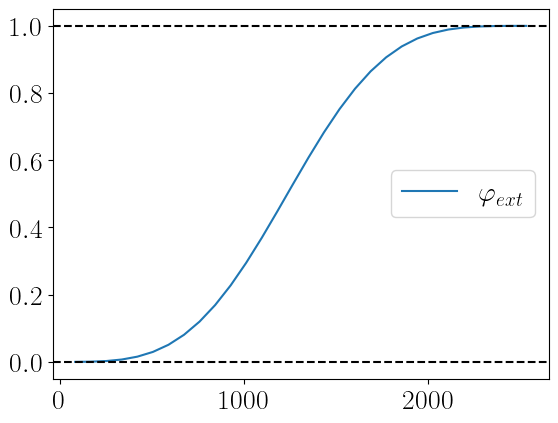

In [511]:
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
#plt.savefig('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
plt.show()

In [514]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_NG=EIGENVECTS2_NG[0]
Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_NG=[]
Overlap2_GS_PHIEXT=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG=propagator2_NG@Psi2_GS_NG
    #phi_ext
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_NG[2])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_NG.append(Overlap_Psi2_GS_NG)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

Hamiltonians calculated
Propagators calculated
Evolution step =  441.7670682730923  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.0003678631983244052
Overlap_Psi2_GS_PHIEXT = 0.0020037863101147043
Hamiltonians calculated
Propagators calculated
Evolution step =  883.5341365461846  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.00278987699913726
Overlap_Psi2_GS_PHIEXT = 0.01726446892281144
Hamiltonians calculated
Propagators calculated
Evolution step =  1325.301204819277  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.00866839091250708
Overlap_Psi2_GS_PHIEXT = 0.06415060764410462
Hamiltonians calculated
Propagators calculated
Evolution step =  1767.0682730923693  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.017364855031037785
Overlap_Psi2_GS_PHIEXT = 0.15904246290815838
Hamiltonians calculated
Propagators calculated
Evolution step =  2208.8353413654618  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.02653939304459839
Overlap_Psi2_GS_PHIEXT = 0.30279116747560747
Hamiltonians calcu

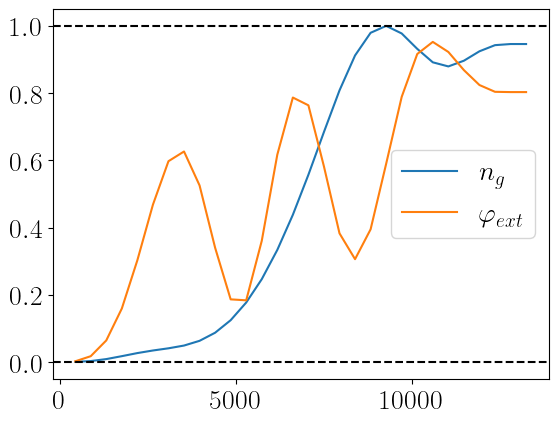

In [515]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T310INVGAP_Nt30_NG_M20N50.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_PHIEXT= np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T310INVGAP_Nt30_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

plt.plot(time_array,Overlap2_GS_NG,label=r"$n_g$")
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
#plt.savefig('T_EVOL_T310INVGAP_Nt30_NG&PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
plt.show()

In [356]:
#HAMILTONIAN FOR PHIEXT WITH THE COSINE FOR VALUES 2 AL REVES

Psi2_GS_NG_back=EIGENVECTS2_NG[2]
Psi2_GS_PHIEXT_back=EIGENVECTS2_PHIEXT[2]

Overlap2_GS_NG_back=[]
Overlap2_GS_PHIEXT_back=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng_backwards(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext_backwards(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG_back=propagator2_NG@Psi2_GS_NG_back
    #phi_ext
    Psi2_GS_PHIEXT_back=propagator2_PHIEXT@Psi2_GS_PHIEXT_back
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG_back=calculate_overlap(Psi2_GS_NG_back,EIGENVECTS2_NG[0])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT_back=calculate_overlap(Psi2_GS_PHIEXT_back,EIGENVECTS2_PHIEXT[0])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG_back)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT_back)
    Overlap2_GS_NG_back.append(Overlap_Psi2_GS_NG_back)
    Overlap2_GS_PHIEXT_back.append(Overlap_Psi2_GS_PHIEXT_back)

Hamiltonians calculated
Propagators calculated
Evolution step =  10.240963855421686  done
Overlaps calculated
Overlap_Psi2_GS_NG = 4.7499483011581475e-11
Overlap_Psi2_GS_PHIEXT = 2.4626709940217013e-10
Hamiltonians calculated
Propagators calculated
Evolution step =  20.481927710843372  done
Overlaps calculated
Overlap_Psi2_GS_NG = 4.27277279022085e-10
Overlap_Psi2_GS_PHIEXT = 2.2159492708585922e-09
Hamiltonians calculated
Propagators calculated
Evolution step =  30.72289156626506  done
Overlaps calculated
Overlap_Psi2_GS_NG = 1.7090400306491842e-09
Overlap_Psi2_GS_PHIEXT = 8.863901513241207e-09
Hamiltonians calculated
Propagators calculated
Evolution step =  40.963855421686745  done
Overlaps calculated
Overlap_Psi2_GS_NG = 4.746457477768879e-09
Overlap_Psi2_GS_PHIEXT = 2.4621040786981516e-08
Hamiltonians calculated
Propagators calculated
Evolution step =  51.20481927710843  done
Overlaps calculated
Overlap_Psi2_GS_NG = 1.0677001928695601e-08
Overlap_Psi2_GS_PHIEXT = 5.539437482246396e-

KeyboardInterrupt: 

In [ ]:
#Ovrlap2_GS_NG_back = np.array(Overlap2_GS_NG_back)
#np.save('T_EVOL_T2500INVGAP_Nt30_NG_M20N50_back.npy', Ovrlap2_GS_NG_back)
#Ovrlap2_GS_PHIEXT_back= np.array(Overlap2_GS_PHIEXT_back)
#np.save('T_EVOL_T2500INVGAP_Nt30_PHIEXT_M20N50_back.npy', Ovrlap2_GS_PHIEXT_back)

plt.plot(time_array,Overlap2_GS_NG_back,label=r"$n_g$")
plt.plot(time_array,Overlap2_GS_PHIEXT_back,label=r"$\varphi_{ext}$")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
#plt.savefig('T_EVOL_T2500INVGAP_Nt30_NG&PHIEXT_M20N50_back.png',dpi=300,bbox_inches='tight')
plt.show()